In [ ]:
#Importing the datas
import pandas as pd
import matplotlib.pyplot as plt
df1=pd.read_csv('VA_file1.csv')
df2=pd.read_csv('VA_file2.csv')

In [ ]:
df2

,Unnamed: 0,index,values,date,month,year,hour
0,0,24,5.6,1.0,1.0,2021.0,0.0
1,1,25,5.6,1.0,1.0,2021.0,1.0
2,2,26,5.6,1.0,1.0,2021.0,2.0
3,3,27,5.2,1.0,1.0,2021.0,3.0
4,4,28,6.0,1.0,1.0,2021.0,4.0
...,...,...,...,...,...,...,...
8755,8755,8779,10.8,31.0,12.0,2021.0,19.0
8756,8756,8780,10.4,31.0,12.0,2021.0,20.0
8757,8757,8781,10.4,31.0,12.0,2021.0,21.0
8758,8758,8782,10.0,31.0,12.0,2021.0,22.0


In [ ]:
#Splitting into the years
df_2021=df2
df_2021=df_2021.drop(columns='Unnamed: 0')

In [ ]:
df_2023=df1[:(8735-2904)]
df_2022=df1[(8735-2904):]
df_2023=df_2023.reset_index(drop=True)

In [ ]:
#ExtraPoalting the Graphs of 2022 using 2021 and 2023
import pandas as pd
num=8736
# Iterate through rows of df1_2023 and df2 simultaneously
for i, (index,row1) in enumerate(df_2023.iterrows()):
    row2 = df_2021.iloc[i]
    df_2022.loc[num,'date']=row1['date']
    df_2022.loc[num,'year']=2022
    df_2022.loc[num,'month']=row1['month']
    df_2022.loc[num,'hour']=row1['hour']
    df_2022.loc[num,'values']=(float(row1['values']) + float(row2['values'])) / 2
    num=num+1
df_2022['year'] = df_2022['year'].astype(int)
df_2022['month'] = df_2022['month'].astype(int)
df_2022['date'] = df_2022['date'].astype(int)
df_2022['hour'] = df_2022['hour'].astype(int)

<ipython-input-143-9798fa032c6a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022.loc[num,'date']=row1['date']


In [ ]:
df_2022=df_2022.reset_index(drop=True)
df_2022

,Unnamed: 0,values,date,month,year,hour
0,5831.0,154.2,31,8,2023,23
1,5832.0,59.4,1,9,2022,0
2,5833.0,148.4,1,9,2022,1
3,5834.0,176.4,1,9,2022,2
4,5835.0,171.6,1,9,2022,3
...,...,...,...,...,...,...
8731,NaN,83.1,31,8,2022,18
8732,NaN,89.1,31,8,2022,19
8733,NaN,90.0,31,8,2022,20
8734,NaN,87.3,31,8,2022,21


In [ ]:
df_2022=df_2022.drop(columns='Unnamed: 0')
# Missing datas
october_31_data = df_2022[(df_2022['month'] == 10) & (df_2022['date'] == 31)]
october_31_data['date'] = 30
october_31_data['month'] = 10
march_26_data=df_2022[(df_2022['month']==3) & (df_2022['date']==25) & (df_2022['hour']==23)]
march_26_data['date'] = 26
#Appending the datas
df_2022 = pd.concat([df_2022, october_31_data.copy()], ignore_index=True)
df_2022 = pd.concat([df_2022, march_26_data.copy()], ignore_index=True)
df_2022.sort_values(by=['month','date','hour'], inplace=True)
df_2022=df_2022.reset_index(drop=True)
df_2022

<ipython-input-145-e28235808a4c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  october_31_data['date'] = 30
<ipython-input-145-e28235808a4c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  october_31_data['month'] = 10
<ipython-input-145-e28235808a4c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

,values,date,month,year,hour
0,5.6,1,1,2022,0
1,4.4,1,1,2022,1
2,4.4,1,1,2022,2
3,5.2,1,1,2022,3
4,8.4,1,1,2022,4
...,...,...,...,...,...
8756,6.4,31,12,2022,19
8757,4.4,31,12,2022,20
8758,4.8,31,12,2022,21
8759,4.4,31,12,2022,22


In [ ]:
df_2022[df_2022['month']==3][df_2022['date']==28][df_2022['hour']==3].index[0]

<ipython-input-146-a19633f32680>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_2022[df_2022['month']==3][df_2022['date']==28][df_2022['hour']==3].index[0]
<ipython-input-146-a19633f32680>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_2022[df_2022['month']==3][df_2022['date']==28][df_2022['hour']==3].index[0]


2067

In [ ]:
print(df_2022.iloc[2067])
print(df_2022.iloc[2068])

values     171.1
date        28.0
month        3.0
year      2022.0
hour         3.0
Name: 2067, dtype: float64
values     160.3
date        28.0
month        3.0
year      2022.0
hour         3.0
Name: 2068, dtype: float64


In [ ]:
df_2022=df_2022.drop(2067)
df_2022=df_2022.reset_index()

In [ ]:
df_2022

,index,values,date,month,year,hour
0,0,5.6,1,1,2022,0
1,1,4.4,1,1,2022,1
2,2,4.4,1,1,2022,2
3,3,5.2,1,1,2022,3
4,4,8.4,1,1,2022,4
...,...,...,...,...,...,...
8755,8756,6.4,31,12,2022,19
8756,8757,4.4,31,12,2022,20
8757,8758,4.8,31,12,2022,21
8758,8759,4.4,31,12,2022,22


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [ ]:
df_2021=df_2021.drop(columns='index')
df_2021

,values,date,month,year,hour
0,5.6,1.0,1.0,2021.0,0.0
1,5.6,1.0,1.0,2021.0,1.0
2,5.6,1.0,1.0,2021.0,2.0
3,5.2,1.0,1.0,2021.0,3.0
4,6.0,1.0,1.0,2021.0,4.0
...,...,...,...,...,...
8755,10.8,31.0,12.0,2021.0,19.0
8756,10.4,31.0,12.0,2021.0,20.0
8757,10.4,31.0,12.0,2021.0,21.0
8758,10.0,31.0,12.0,2021.0,22.0


In [ ]:
#Extrapolating the graph of 2023 using the 2022 and 2021
import pandas as pd
new_rows = []
for i in range(5832, 8760):
    new_row_data = {'date': df_2022.iloc[i]['date'],
                    'year': 2023,
                    'month': df_2022.iloc[i]['month'],
                    'hour': df_2022.iloc[i]['hour'],
                    'values': (float(2 * df_2022.iloc[i]['values']) - float(df_2021.iloc[i]['values']))}
    new_rows.append(new_row_data)
new_rows_df = pd.DataFrame(new_rows)
df_2023 = pd.concat([df_2023, new_rows_df], ignore_index=True)
df_2023.sort_values(by=['month', 'date', 'hour'], inplace=True)
df_2023 = df_2023.reset_index(drop=True)

In [ ]:
df_2023

,Unnamed: 0,values,date,month,year,hour
0,0.0,5.6,1.0,1.0,2023,0.0
1,1.0,3.2,1.0,1.0,2023,1.0
2,2.0,3.2,1.0,1.0,2023,2.0
3,3.0,5.2,1.0,1.0,2023,3.0
4,4.0,10.8,1.0,1.0,2023,4.0
...,...,...,...,...,...,...
8754,NaN,2.0,31.0,12.0,2023,19.0
8755,NaN,-1.6,31.0,12.0,2023,20.0
8756,NaN,-0.8,31.0,12.0,2023,21.0
8757,NaN,-1.2,31.0,12.0,2023,22.0


In [ ]:
#Missing the days of the year 2023
march_26_data=df_2022[(df_2022['month']==3) & (df_2022['date']==25) & (df_2022['hour']==23)]
march_26_data['date'] = 26
march_26_data['year']=23
df_2023 = pd.concat([march_26_data,df_2023], ignore_index=True)
df_2023.sort_values(by=['month','date','hour'], inplace=True)
df_2023=df_2023.reset_index(drop=True)
df_2023=df_2023.drop(columns='Unnamed: 0')

<ipython-input-153-638d2e4f9ccc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  march_26_data['date'] = 26
<ipython-input-153-638d2e4f9ccc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  march_26_data['year']=23


In [ ]:
df_2023

,index,values,date,month,year,hour
0,NaN,5.6,1.0,1.0,2023,0.0
1,NaN,3.2,1.0,1.0,2023,1.0
2,NaN,3.2,1.0,1.0,2023,2.0
3,NaN,5.2,1.0,1.0,2023,3.0
4,NaN,10.8,1.0,1.0,2023,4.0
...,...,...,...,...,...,...
8755,NaN,2.0,31.0,12.0,2023,19.0
8756,NaN,-1.6,31.0,12.0,2023,20.0
8757,NaN,-0.8,31.0,12.0,2023,21.0
8758,NaN,-1.2,31.0,12.0,2023,22.0


In [ ]:
#Extrapolating the 2020,2019,2018 using 2021,2022,2023
import pandas as pd

# Create empty DataFrames for years 2020, 2019, and 2018
df_2020 = pd.DataFrame()
df_2019 = pd.DataFrame()
df_2018 = pd.DataFrame()

# Loop through the range of indices
for i in range(0, 8760):
    # Calculate values for the respective years
    values_2020 = ((2 * float(df_2021.iloc[i]['values'])) - (float(df_2022.iloc[i]['values'])))
    values_2019 = ((2 * values_2020) - (float(df_2021.iloc[i]['values'])))
    values_2018 = ((2 * values_2019) - (values_2020))


    df_2020.loc[i,'hour']=df_2021.iloc[i]['hour']
    df_2020.loc[i,'month']=df_2021.iloc[i]['month']
    df_2020.loc[i,'date']=df_2021.iloc[i]['date']
    df_2020.loc[i,'year']=2020
    df_2020.loc[i,'values']=values_2020


    df_2019.loc[i,'hour']=df_2020.iloc[i]['hour']
    df_2019.loc[i,'month']=df_2020.iloc[i]['month']
    df_2019.loc[i,'date']=df_2020.iloc[i]['date']
    df_2019.loc[i,'year']=2019
    df_2019.loc[i,'values']=values_2019

    df_2018.loc[i,'hour']=df_2020.iloc[i]['hour']
    df_2018.loc[i,'month']=df_2020.iloc[i]['month']
    df_2018.loc[i,'date']=df_2020.iloc[i]['date']
    df_2018.loc[i,'year']=2018
    df_2018.loc[i,'values']=values_2018

print("DataFrame for 2023:")
print(df_2023)
print("DataFrame for 2022:")
print(df_2022)
print("DataFrame for 2021:")
print(df_2021)
print("DataFrame for 2020:")
print(df_2020)
print("\nDataFrame for 2019:")
print(df_2019)
print("\nDataFrame for 2018:")
print(df_2018)

DataFrame for 2023:
      index  values  date  month  year  hour
0       NaN     5.6   1.0    1.0  2023   0.0
1       NaN     3.2   1.0    1.0  2023   1.0
2       NaN     3.2   1.0    1.0  2023   2.0
3       NaN     5.2   1.0    1.0  2023   3.0
4       NaN    10.8   1.0    1.0  2023   4.0
...     ...     ...   ...    ...   ...   ...
8755    NaN     2.0  31.0   12.0  2023  19.0
8756    NaN    -1.6  31.0   12.0  2023  20.0
8757    NaN    -0.8  31.0   12.0  2023  21.0
8758    NaN    -1.2  31.0   12.0  2023  22.0
8759    NaN     3.6  31.0   12.0  2023  23.0

[8760 rows x 6 columns]
DataFrame for 2022:
      index  values  date  month  year  hour
0         0     5.6     1      1  2022     0
1         1     4.4     1      1  2022     1
2         2     4.4     1      1  2022     2
3         3     5.2     1      1  2022     3
4         4     8.4     1      1  2022     4
...     ...     ...   ...    ...   ...   ...
8755   8756     6.4    31     12  2022    19
8756   8757     4.4    31     12  2

In [ ]:
df_2023.to_csv('VA_2023.csv')
df_2022.to_csv('VA_2022.csv')
df_2021.to_csv('VA_2021.csv')
df_2020.to_csv('VA_2020.csv')
df_2019.to_csv('VA_2019.csv')
df_2018.to_csv('VA_2018.csv')

In [ ]:
#Table for the VA (6* 8760)
import pandas as pd
mixed_df=pd.DataFrame()
mixed_df['date']=df_2023['date']
mixed_df['month']=df_2023['month']
mixed_df['hour']=df_2023['hour']
mixed_df['values_2023']=df_2023['values'].astype(float).round(2)
mixed_df['values_2022']=df_2022['values'].astype(float).round(2)
mixed_df['values_2021']=df_2021['values'].astype(float).round(2)
mixed_df['values_2020']=df_2020['values'].astype(float).round(2)
mixed_df['values_2019']=df_2019['values'].astype(float).round(2)
mixed_df['values_2018']=df_2018['values'].astype(float).round(2)
mixed_df

,date,month,hour,values_2023,values_2022,values_2021,values_2020,values_2019,values_2018
0,1.0,1.0,0.0,5.6,5.6,5.6,5.6,5.6,5.6
1,1.0,1.0,1.0,3.2,4.4,5.6,6.8,8.0,9.2
2,1.0,1.0,2.0,3.2,4.4,5.6,6.8,8.0,9.2
3,1.0,1.0,3.0,5.2,5.2,5.2,5.2,5.2,5.2
4,1.0,1.0,4.0,10.8,8.4,6.0,3.6,1.2,-1.2
...,...,...,...,...,...,...,...,...,...
8755,31.0,12.0,19.0,2.0,6.4,10.8,15.2,19.6,24.0
8756,31.0,12.0,20.0,-1.6,4.4,10.4,16.4,22.4,28.4
8757,31.0,12.0,21.0,-0.8,4.8,10.4,16.0,21.6,27.2
8758,31.0,12.0,22.0,-1.2,4.4,10.0,15.6,21.2,26.8


In [ ]:
mixed_df.to_csv('VA_mixed.csv')

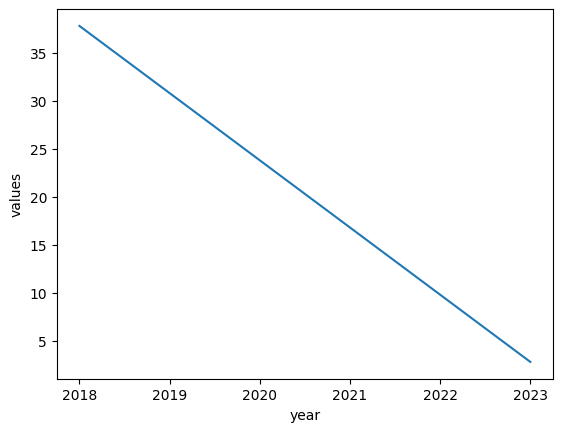

In [ ]:
#Random Graph Generator
import matplotlib.pyplot as plt
import random
i=random.randint(0, 8759)
y_values=[mixed_df['values_2018'].iloc[i],mixed_df['values_2019'].iloc[i],mixed_df['values_2020'].iloc[i],mixed_df['values_2021'].iloc[i],mixed_df['values_2022'].iloc[i],mixed_df['values_2023'].iloc[i]]
x_values=[2018,2019,2020,2021,2022,2023]
plt.plot(x_values,y_values)
plt.xlabel('year')
plt.ylabel('values')
plt.show()